![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)


# 8. Beta Regression

Beta regression is a powerful tool for modeling bounded continuous data, especially when the dependent variable takes values between 0 and 1, such as proportions or rates. By using the beta distribution, beta regression handles the constraints of bounded data while also providing flexibility in modeling both the mean and the dispersion of the response variable.
In this tutorial, we demonstrated how to implement beta regression from scratch in R using maximum likelihood estimation to estimate the model parameters. Although this approach does not use specialized beta regression packages, it highlights the underlying statistical principles of beta regression, including the formulation of the log-likelihood function and optimization techniques.

By understanding the mechanics of beta regression, users can effectively apply this technique to their datasets with bounded response variables, providing more accurate and meaningful predictions compared to traditional linear regression.

## Overview

Beta regression is a type of regression model used when the dependent variable $y$ is continuous and constrained within an interval, typically $(0, 1)$. This is common for proportions or rates, like percentages (excluding 0 and 1). Traditional linear regression models don’t work well in these cases, as they can predict values outside the $(0, 1)$ interval, and assumptions of normality and homoscedasticity may not hold. Beta regression is built on the beta distribution, which is well-suited for modeling such bounded data.

Here’s a step-by-step explanation of beta regression, including key mathematical details.

***Understanding the Beta Distribution***

The beta distribution is a continuous probability distribution defined on the interval $(0, 1)$. Its probability density function is given by:

$$ f(y; \alpha, \beta) = \frac{y^{\alpha - 1} (1 - y)^{\beta - 1}}{B(\alpha, \beta)} $$

where:

-   \$ y \in (0, 1) \$ is the variable of interest.

-   \$\alpha \> 0 \$ and $\beta > 0$ are shape parameters.

-   $B(\alpha, \beta)$ is the beta function, which normalizes the distribution:

$$ B(\alpha, \beta) = \int_0^1 t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt $$

The mean $\mu$ and variance $\sigma^2$ of a beta distribution are given by:

$$ \mu = \frac{\alpha}{\alpha + \beta}, \quad \sigma^2 = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)} $$

The mean $\mu$ represents the central tendency, while the variance $\sigma^2$ reflects the spread.

***Modeling the Mean with a Link Function***

In beta regression, we model the mean $\mu$ of the beta distribution as a function of the predictors $X$. Since $\mu \in (0, 1)$), we apply a link function $g(\cdot)$ to transform $\mu$ into an unbounded linear predictor:

$$ g(\mu) = X \beta $$

Common choices for the link function $g(\cdot)$ are:

-   The logit link: $g(\mu) = \log \left( \frac{\mu}{1 - \mu} \right)$

-   The probit link: $g(\mu) = \Phi^{-1}(\mu)$, where $\Phi^{-1}$ is the inverse CDF of the normal distribution

The link function ensures that $\mu$ lies between 0 and 1, regardless of the values of $X$.

***Specifying the Dispersion Parameter***

In addition to the mean, beta regression also incorporates a precision (or dispersion) parameter, often denoted by $\phi$. The parameters $\alpha$ and $\beta$ can be reparametrized in terms of $\mu$ and $\phi$ as follows:

$$ \alpha = \mu \phi, \quad \beta = (1 - \mu) \phi $$

Here, $\phi$ is related to the variance of $y$), with larger values of $\phi$ leading to a smaller variance. Unlike in ordinary regression, where variance is typically constant, in beta regression, the dispersion parameter $\phi$ allows for flexibility in the variability of $y$ based on the values of the predictors.

***Defining the Likelihood Function***

The likelihood function for beta regression is based on the beta distribution’s PDF. Given ( n ) observations, the likelihood function is:

$$ L(\beta, \phi; y) = \prod_{i=1}^n f(y_i; \mu_i, \phi) = \prod_{i=1}^n \frac{y_i^{\mu_i \phi - 1} (1 - y_i)^{(1 - \mu_i) \phi - 1}}{B(\mu_i \phi, (1 - \mu_i) \phi)} $$

Taking the logarithm of the likelihood function (for simplicity in optimization) gives the log-likelihood:

$$ \log L(\beta, \phi; y) = \sum_{i=1}^n \left[ (\mu_i \phi - 1) \log y_i + ((1 - \mu_i) \phi - 1) \log (1 - y_i) - \log B(\mu_i \phi, (1 - \mu_i) \phi) \right] $$

***Estimating Parameters Using Maximum Likelihood***

To estimate the parameters $\beta$ and $\phi$, we maximize the log-likelihood function. This is often done using numerical optimization techniques because the log-likelihood function is complex and does not have a closed-form solution.

The parameter estimates $\hat{\beta}$ and $\hat{\phi}$ are obtained by solving:

$$ \frac{\partial \log L}{\partial \beta} = 0 \quad \text{and} \quad \frac{\partial \log L}{\partial \phi} = 0 $$

Once these parameters are estimated, they can be used to predict the mean response $\mu$ for new data points.

***Interpreting the Model***

After fitting a beta regression model, we interpret $\beta$ coefficients in terms of their effect on the log-odds (if using the logit link) of the mean $\mu$. A positive $\beta_j$ implies that an increase in $X_j$ is associated with an increase in the mean of $y$, while a negative $\beta_j$ implies the opposite.

The dispersion parameter ( \phi ) provides insight into the variability of ( y ): a high ( \phi ) implies that the values of ( y ) are tightly clustered around the mean, while a low ( \phi ) suggests more variability.


## Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314972 sha256=02a2e3ba992bece2ea65eadb811becda61d80f416fc28b32e4ac91b99576de20
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Beta Regression Model from Scratch

To demonstrate beta regression in R without using any specialized package, we'll need to work directly with the beta distribution and likelihood functions. This example will walk through generating synthetic data, defining the likelihood function for beta regression, estimating parameters with numerical optimization, and evaluating model performance.

### Generate Synthetic Data

We'll generate synthetic data with four predictors and a target variable $y$) constrained between $(0, 1)$ We'll simulate the beta-distributed response $y$ based on a linear combination of the predictors transformed through a logistic function to ensure values stay in the $(0, 1)$ range.

In [ ]:
%%R
# set seeds for reproducibility
set.seed(123)

# Generate predictors
n <- 100
X1 <- rnorm(n, mean = 0, sd = 1)
X2 <- rnorm(n, mean = 0, sd = 1)
X3 <- rnorm(n, mean = 0, sd = 1)
X4 <- rnorm(n, mean = 0, sd = 1)

# Define true coefficients
beta <- c(0.5, -0.3, 0.8, -0.2, 0.1) # Intercept + 4 predictors
phi <- 10 # Dispersion parameter

# Calculate the linear predictor and apply logistic link function to get mu
linear_predictor <- beta[1] + beta[2]*X1 + beta[3]*X2 + beta[4]*X3 + beta[5]*X4
mu <- 1 / (1 + exp(-linear_predictor))

# Generate beta-distributed response variable y
alpha <- mu * phi
beta_param <- (1 - mu) * phi
y <- rbeta(n, alpha, beta_param)

# Combine data into a data frame
data <- data.frame(y = y, X1 = X1, X2 = X2, X3 = X3, X4 = X4)
head(data)

          y          X1          X2         X3         X4
1 0.3857103 -0.56047565 -0.71040656  2.1988103 -0.7152422
2 0.7940054 -0.23017749  0.25688371  1.3124130 -0.7526890
3 0.3384641  1.55870831 -0.24669188 -0.2651451 -0.9385387
4 0.4915856  0.07050839 -0.34754260  0.5431941 -1.0525133
5 0.5579215  0.12928774 -0.95161857 -0.4143399 -0.4371595
6 0.8024065  1.71506499 -0.04502772 -0.4762469  0.3311792


### Define the Beta Regression Log-Likelihood Function

We'll create a function to compute the log-likelihood of the beta regression model. The function takes the model parameters (coefficients $\beta$ and dispersion parameter $\phi$) and the data as input and returns the negative log-likelihood. We use the `dbeta()` function from the `stats` package to calculate the log-likelihood for each observation.

In [ ]:
%%R
# Define the log-likelihood function for Gamma regression
log_likelihood <- function(params, data) {
  # Extract parameters
  beta <- params[1:5]      # coefficients (intercept + 4 predictors)
  phi <- exp(params[6])     # dispersion parameter, transformed to be positive

  # Linear predictor
  X <- as.matrix(cbind(1, data[, -1])) # Add intercept to predictors matrix
  linear_predictor <- X %*% beta
  mu <- 1 / (1 + exp(-linear_predictor)) # Logistic link function

  # Calculate alpha and beta parameters of the beta distribution
  alpha <- mu * phi
  beta_param <- (1 - mu) * phi

  # Log-likelihood calculation
  ll <- sum(dbeta(data$y, alpha, beta_param, log = TRUE))
  return(-ll) # Return negative log-likelihood for minimization
}

### Fit the Model Using Numerical Optimization

We’ll use `optim()` to minimize the negative log-likelihood and estimate the parameters. We start with random initial guesses for the parameters and use the BFGS optimization method. The `hessian = TRUE` argument allows us to approximate standard errors later.

In [ ]:
%%R
# Initial parameter guesses (random starting values)
initial_params <- c(0, 0, 0, 0, 0, log(1))

# Optimize
fit <- optim(par = initial_params, fn = log_likelihood, data = data, method = "BFGS", hessian = TRUE)

# Extract estimated parameters
beta_hat <- fit$par[1:5]
phi_hat <- exp(fit$par[6])

cat("Estimated coefficients (beta):\n", beta_hat, "\n")
cat("Estimated dispersion parameter (phi):\n", phi_hat, "\n")

Estimated coefficients (beta):
 0.5446189 -0.1674559 0.8265935 -0.3049972 0.06331931 
Estimated dispersion parameter (phi):
 9.908912 


### Display Model Summary

Let's create a summary table for the estimated coefficients and their standard errors. The `hessian` matrix from `optim()` can be used to approximate standard errors.

In [ ]:
%%R
# Standard errors from the Hessian
se <- sqrt(diag(solve(fit$hessian)))
# Extract estimated coefficients and phi
beta_est <- fit$par[1:5]
phi_est <- exp(fit$par[6])  # Inverse of log transformation

# Print results
summary_table <- data.frame(Coefficient = c("Intercept", "X1", "X2", "X3", "X4"),
                            Estimate = beta_est)
summary_table

  Coefficient    Estimate
1   Intercept  0.54461892
2          X1 -0.16745590
3          X2  0.82659346
4          X3 -0.30499722
5          X4  0.06331931


### Dispersion Parameter

In [ ]:
%%R
# Dispersion parameter has already been calculated as phi_est
cat("Dispersion Parameter (phi) from the model:", phi_est, "\n")


Dispersion Parameter (phi) from the model: 9.908912 


### Evaluate Model Performance

We’ll use the estimated parameters to compute the fitted values of ( $\mu$ ) and check the model’s performance by comparing predicted values to actual values.


In [ ]:
%%R
# Compute predicted values of mu
linear_predictor_hat <- as.matrix(cbind(1, data[, -1])) %*% beta_hat
mu_hat <- 1 / (1 + exp(-linear_predictor_hat))

# Mean Squared Error (MSE) as a performance metric
mse <- mean((data$y - mu_hat)^2)
cat("Mean Squared Error (MSE):\n", mse, "\n")

Mean Squared Error (MSE):
 0.01861497 


### Cross-validation

To evaluate the beta regression model using cross-validation, we can use a simple $k$-fold cross-validation approach. Cross-validation will split the data into k subsets, train the model on $k−1$ folds, and evaluate it on the remaining fold. We repeat this process $k$ times, each time using a different fold for validation.

Here's how to implement $k$-fold cross-validation for the beta regression model created earlier. We’ll compute the Mean Squared Error (MSE) for each fold as a performance metric and calculate the average MSE across all folds.

In [ ]:
%%R
# Step 1: Define Cross-Validation Function
cross_validate_beta_regression <- function(data, k = 5) {
  n <- nrow(data)
  indices <- sample(1:n)  # Shuffle data
  fold_size <- floor(n / k)

  mse_values <- numeric(k)  # To store MSE for each fold

  for (i in 1:k) {
    # Define training and validation indices
    val_indices <- indices[((i - 1) * fold_size + 1):(i * fold_size)]
    train_data <- data[-val_indices, ]
    val_data <- data[val_indices, ]

    # Fit the model on training data
    initial_params <- c(0, 0, 0, 0, 0, log(1))
    fit <- optim(par = initial_params, fn = log_likelihood, data = train_data, method = "BFGS")

    # Extract the estimated parameters
    beta_hat <- fit$par[1:5]
    phi_hat <- exp(fit$par[6])

    # Compute predictions for validation data
    X_val <- as.matrix(cbind(1, val_data[, -1]))  # Add intercept
    linear_predictor_val <- X_val %*% beta_hat
    mu_val <- 1 / (1 + exp(-linear_predictor_val))  # Predicted mean for validation data

    # Calculate MSE for this fold
    mse_values[i] <- mean((val_data$y - mu_val)^2)
  }

  # Return average MSE across all folds
  avg_mse <- mean(mse_values)
  return(avg_mse)
}

# Step 2: Run Cross-Validation
set.seed(123)
k <- 5
avg_mse_cv <- cross_validate_beta_regression(data, k)
cat("Average Cross-Validated MSE:", avg_mse_cv, "\n")

Average Cross-Validated MSE: 0.02046396 



## Beta Regression in R

In beta regression, we model the mean of the response variable (proportion) through a link function (usually a logit or log-log link) to keep predictions within the 0-1 range. The mean prediction of the response variable is often interpreted as the central tendency of the outcome for given levels of the predictors.

### Check and Install Required R Packages

In [9]:
%%R
packages <- c('tidyverse',
     'plyr',
	  'DataExplorer',
		 'dlookr',
		 'rstatix',
	   'gtsummary',
		 'performance',
	   'report',
		 'sjPlot',
		 'margins',
		 'marginaleffects',
		 'ggeffects',
		 'patchwork',
		 'Metrics',
		 'MASS',
     'betareg',
    'lmtest'
	  	)

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(pkg %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [7]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
      tidyverse            plyr    DataExplorer          dlookr         rstatix 
           TRUE            TRUE            TRUE            TRUE            TRUE 
      gtsummary     performance          report          sjPlot         margins 
           TRUE            TRUE            TRUE            TRUE            TRUE 
marginaleffects       ggeffects       patchwork         Metricx            MASS 
           TRUE            TRUE            TRUE           FALSE            TRUE 
        betareg          lmtest 
           TRUE            TRUE 


### Load packages

In [10]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


Successfully loaded packages:
 [1] "package:lmtest"          "package:zoo"            
 [3] "package:betareg"         "package:MASS"           
 [5] "package:Metrics"         "package:patchwork"      
 [7] "package:ggeffects"       "package:marginaleffects"
 [9] "package:margins"         "package:sjPlot"         
[11] "package:report"          "package:performance"    
[13] "package:gtsummary"       "package:rstatix"        
[15] "package:dlookr"          "package:DataExplorer"   
[17] "package:plyr"            "package:lubridate"      
[19] "package:forcats"         "package:stringr"        
[21] "package:dplyr"           "package:purrr"          
[23] "package:readr"           "package:tidyr"          
[25] "package:tibble"          "package:ggplot2"        
[27] "package:tidyverse"       "package:tools"          
[29] "package:stats"           "package:graphics"       
[31] "package:grDevices"       "package:utils"          
[33] "package:datasets"        "package:methods"        
[

### Data

In this tutorial, we will use Prater's well-known gasoline yield data from 1956. The primary variable of interest is `yield`, which represents the proportion of crude oil converted to gasoline after distillation and fractionation. A beta regression model is particularly suitable for analyzing this variable. We also have two explanatory variables: `temp`, the temperature (measured in degrees Fahrenheit) at which all the gasoline has vaporized, and `batch`, a categorical variable denoting ten unique batches of conditions involved in the experiments based on various other factors.

Source: Prater NH (1956). “Estimate Gasoline Yields from Crudes.” Petroleum Refiner, 35(5), 236–238.


In [ ]:
%%R
data("GasolineYield", package = "betareg")
glimpse(GasolineYield)

Rows: 32
Columns: 6
$ yield    <dbl> 0.122, 0.223, 0.347, 0.457, 0.080, 0.131, 0.266, 0.074, 0.182…
$ gravity  <dbl> 50.8, 50.8, 50.8, 50.8, 40.8, 40.8, 40.8, 40.0, 40.0, 40.0, 3…
$ pressure <dbl> 8.6, 8.6, 8.6, 8.6, 3.5, 3.5, 3.5, 6.1, 6.1, 6.1, 6.1, 6.1, 6…
$ temp10   <dbl> 190, 190, 190, 190, 210, 210, 210, 217, 217, 217, 220, 220, 2…
$ temp     <dbl> 205, 275, 345, 407, 218, 273, 347, 212, 272, 340, 235, 300, 3…
$ batch    <fct> 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7…


First we use We use `diagnose()` function of {dlookr} package to do general general diagnosis of all variables.


In [ ]:
%%R
dlookr::diagnose(GasolineYield)

  method          from  
  plot.transform  scales
  print.transform scales



# A tibble: 6 × 6
  variables types   missing_count missing_percent unique_count unique_rate
  <chr>     <chr>           <int>           <dbl>        <int>       <dbl>
1 yield     numeric             0               0           32       1    
2 gravity   numeric             0               0            9       0.281
3 pressure  numeric             0               0            9       0.281
4 temp10    numeric             0               0           10       0.312
5 temp      numeric             0               0           28       0.875
6 batch     factor              0               0           10       0.312



## Fit Beta Models in R

In beta regression, we model the mean of the response variable (proportion) through a link function (usually a logit or log-log link) to keep predictions within the 0-1 range. The mean prediction of the response variable is often interpreted as the central tendency of the outcome for given levels of the predictors.

`betareg()` function fit beta regression models for rates and proportions via maximum likelihood using a parametrization with mean (depending through a link function on the covariates) and precision parameter (called phi). The argument of `betareg(0)` are:

> ```         
> betareg(formula, data, subset, na.action, weights, offset,
>   link = c("logit", "probit", "cloglog", "cauchit", "log", "loglog"),
>   link.phi = NULL, type = c("ML", "BC", "BR"), dist = NULL, nu = NULL,
>   control = betareg.control(...), model = TRUE,
>   y = TRUE, x = FALSE, ...)
> ```

The link for the $\Phi_{i}$ precision equation can be changed by `link.phi` in both cases where `identity`, `log`, and `sqrt` are allowed as admissible values. The default for the $\mu$ mean equation is always the logit link but all link functions for the binomial family in `glm()` are allowed as well as the log-log link: "`logit`, `probit`, `cloglog`, `cauchit`, \`log, and "loglog".






### Standard Beta Regression Model

First, we will fit `betareg` model where yield depends on batch and temp, using the standard `logit link` function:

In [ ]:
%%R
# Standard Beta Regression Model
fit.beta.01<-betareg(yield ~ batch + temp, data = GasolineYield)
summary(fit.beta.01)


Call:
betareg(formula = yield ~ batch + temp, data = GasolineYield)

Quantile residuals:
    Min      1Q  Median      3Q     Max 
-2.1396 -0.5698  0.1202  0.7040  1.7506 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.1595710  0.1823247 -33.784  < 2e-16 ***
batch1       1.7277289  0.1012294  17.067  < 2e-16 ***
batch2       1.3225969  0.1179020  11.218  < 2e-16 ***
batch3       1.5723099  0.1161045  13.542  < 2e-16 ***
batch4       1.0597141  0.1023598  10.353  < 2e-16 ***
batch5       1.1337518  0.1035232  10.952  < 2e-16 ***
batch6       1.0401618  0.1060365   9.809  < 2e-16 ***
batch7       0.5436922  0.1091275   4.982 6.29e-07 ***
batch8       0.4959007  0.1089257   4.553 5.30e-06 ***
batch9       0.3857930  0.1185933   3.253  0.00114 ** 
temp         0.0109669  0.0004126  26.577  < 2e-16 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi)    440.3      1

-   Batch and temperature are both significant predictors of yield in the GasolineYield data.

-   Higher values of `batch` and `temp` are associated with an increase in the mean gasoline yield, meaning these factors positively influence yield when considered individually.

The high value of the `dispersion parameter ($\Phi$)` (492.0) suggests that gasoline yields in the data are relatively consistent around their predicted means for the given conditions, which may indicate a good fit (less dispersion).

### Variable Dispersion Beta Regression Model

In standard beta regression, the dispersion parameter $\Phi$ controls the variability of the response variable around its mean. A single (constant) $\Phi$ is estimated for the entire model, implying that all observations have the same degree of variability around the mean.

In a variable dispersion model, we allow the dispersion parameter $\Phi$ to vary based on one or more predictor variables. This means that $\Phi$ itself is modeled as a function of some variables, just like the mean. Variable dispersion models are useful when:

-   The variability of the response is expected to differ across certain levels of predictors. For example, in a clinical trial, patients from different treatment groups may exhibit varying response variability.

-   The residuals from a standard beta regression model show patterns that suggest unequal dispersion across values of certain predictors.

In [ ]:
%%R
# Variable Dispersion Beta Regression Model
fit.beta.02<-betareg(yield ~ batch + temp | temp, data = GasolineYield)
summary(fit.beta.02)


Call:
betareg(formula = yield ~ batch + temp | temp, data = GasolineYield)

Quantile residuals:
    Min      1Q  Median      3Q     Max 
-2.1040 -0.5852 -0.1425  0.6899  2.5203 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.9232361  0.1835262 -32.275  < 2e-16 ***
batch1       1.6019877  0.0638561  25.087  < 2e-16 ***
batch2       1.2972663  0.0991001  13.090  < 2e-16 ***
batch3       1.5653383  0.0997392  15.694  < 2e-16 ***
batch4       1.0300720  0.0632882  16.276  < 2e-16 ***
batch5       1.1541630  0.0656427  17.582  < 2e-16 ***
batch6       1.0194446  0.0663510  15.364  < 2e-16 ***
batch7       0.6222591  0.0656325   9.481  < 2e-16 ***
batch8       0.5645830  0.0601846   9.381  < 2e-16 ***
batch9       0.3594390  0.0671406   5.354 8.63e-08 ***
temp         0.0103595  0.0004362  23.751  < 2e-16 ***

Phi coefficients (precision model with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 1

### The Beta Regression with `log-log` link function

In binomial Generalized Linear Models (GLMs), choosing the right link function is crucial for enhancing model fit, particularly when the data includes extreme proportions (values close to 0 or 1). In such cases, we will use `log-log` link function instead of the default `logit link`.

In [ ]:
%%R
fit.beta.03<-betareg(yield ~ batch + temp ,
                      data = GasolineYield,
                      link = "loglog")
summary(fit.beta.03)


Call:
betareg(formula = yield ~ batch + temp, data = GasolineYield, link = "loglog")

Quantile residuals:
    Min      1Q  Median      3Q     Max 
-1.7440 -0.7260  0.1112  0.6855  2.5924 

Coefficients (mean model with loglog link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.7937944  0.0579177 -48.237  < 2e-16 ***
batch1       0.9038714  0.0347387  26.019  < 2e-16 ***
batch2       0.6553991  0.0376683  17.399  < 2e-16 ***
batch3       0.7684237  0.0378459  20.304  < 2e-16 ***
batch4       0.5375955  0.0335027  16.046  < 2e-16 ***
batch5       0.5516613  0.0346755  15.909  < 2e-16 ***
batch6       0.5198331  0.0351349  14.795  < 2e-16 ***
batch7       0.2921514  0.0340681   8.576  < 2e-16 ***
batch8       0.2504792  0.0349788   7.161 8.02e-13 ***
batch9       0.1871284  0.0383089   4.885 1.04e-06 ***
temp         0.0053645  0.0001341  40.008  < 2e-16 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(ph

Variable dispersion shows a significant improvement with the inclusion of the `temp` regressor.

### The Beta Regression with `link.phi = "log"` link function

Typically, a log-link leads to somewhat improved quadratic approximations of the likelihood and less iterations in the optimization. For example, refitting `fit.beat.03` (loglog model) with `g2(·) = log(·)` converges more quickly:

In [ ]:
%%R
# Beta Regression Model  with loglog link function
fit.beta.04<- update(fit.beta.03, link.phi = "log")
summary(fit.beta.04)


Call:
betareg(formula = yield ~ batch + temp, data = GasolineYield, link = "loglog", 
    link.phi = "log")

Quantile residuals:
    Min      1Q  Median      3Q     Max 
-1.7440 -0.7260  0.1112  0.6855  2.5924 

Coefficients (mean model with loglog link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.7937944  0.0579177 -48.237  < 2e-16 ***
batch1       0.9038714  0.0347387  26.019  < 2e-16 ***
batch2       0.6553991  0.0376683  17.399  < 2e-16 ***
batch3       0.7684237  0.0378459  20.304  < 2e-16 ***
batch4       0.5375955  0.0335027  16.046  < 2e-16 ***
batch5       0.5516613  0.0346755  15.909  < 2e-16 ***
batch6       0.5198331  0.0351349  14.795  < 2e-16 ***
batch7       0.2921514  0.0340681   8.576  < 2e-16 ***
batch8       0.2504792  0.0349788   7.161 8.02e-13 ***
batch9       0.1871284  0.0383089   4.885 1.04e-06 ***
temp         0.0053645  0.0001341  40.008  < 2e-16 ***

Phi coefficients (precision model with log link):
            Estimate Std. Error 

with a lower number of iterations than for gy_loglog which had 51 iterations.

### Model Comparison

We will use `lrtest{}` of {lmtest} package for comparisons of models via asymptotic `likelihood ratio tests`.

In [ ]:
%%R
lrtest(fit.beta.01, fit.beta.02,fit.beta.03)

Likelihood ratio test

Model 1: yield ~ batch + temp
Model 2: yield ~ batch + temp | temp
Model 3: yield ~ batch + temp
  #Df LogLik Df  Chisq Pr(>Chisq)    
1  12 84.798                         
2  13 86.977  1  4.359    0.03681 *  
3  12 96.155 -1 18.356  1.832e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
AIC(fit.beta.01, fit.beta.02,fit.beta.03)

            df       AIC
fit.beta.01 12 -145.5951
fit.beta.02 13 -147.9541
fit.beta.03 12 -168.3101


The `temp` were included as a regressor in the precision equation of logit.03, it would no longer yield significant improvements. Thus, improvement of the model fit in the mean equation by adoption of the log-log link have waived the need for a variable precision equation

In [ ]:
%%R
lrtest(fit.beta.01, . ~ . + I(predict(fit.beta.01, type = "link")^2))


Likelihood ratio test

Model 1: yield ~ batch + temp
Model 2: yield ~ batch + temp + I(predict(fit.beta.01, type = "link")^2)
  #Df LogLik Df  Chisq Pr(>Chisq)    
1  12 84.798                         
2  13 96.001  1 22.407  2.205e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lrtest(fit.beta.03, . ~ . + I(predict(fit.beta.03, type = "link")^2))

Likelihood ratio test

Model 1: yield ~ batch + temp
Model 2: yield ~ batch + temp + I(predict(fit.beta.03, type = "link")^2)
  #Df LogLik Df  Chisq Pr(>Chisq)
1  12 96.155                     
2  13 96.989  1 1.6671     0.1966


The improvement of the model fit can also be brought out graphically in a display of predicted vs. observed values"

In [ ]:
%%R
logit.df<-cbind.data.frame(Obs = GasolineYield$yield, Pred = fit.beta.01$fitted.values )
loglog.df<-cbind.data.frame(Obs = GasolineYield$yield, Pred = fit.beta.03$fitted.values )

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


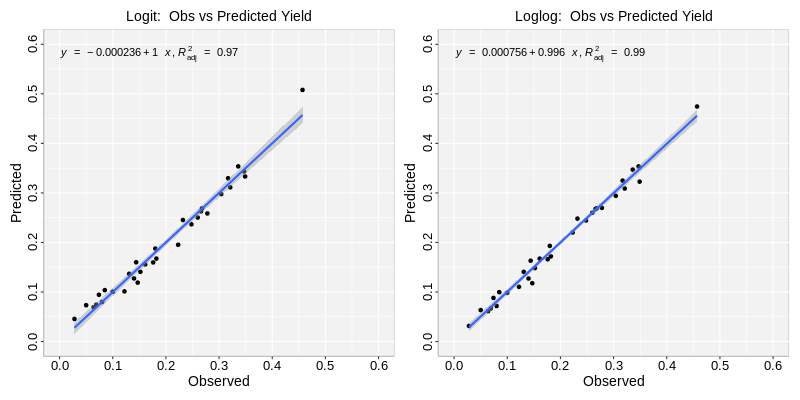

In [ ]:
%%R -w 800 -h 400 -u px
library(ggpmisc)
formula<-y~x

p1<-ggplot(logit.df, aes(Obs,Pred)) +
  geom_point() +
    geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("Logit:  Obs vs Predicted Yield") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,0.6), breaks=seq(0, 0.6, 0.1))+
  scale_y_continuous(limits=c(0,0.6), breaks=seq(0, 0.6, 0.1)) +
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

p2<-ggplot(loglog.df, aes(Obs,Pred)) +
  geom_point() +
   geom_smooth(method = "lm")+
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
  ggtitle("Loglog:  Obs vs Predicted Yield") +
  xlab("Observed") + ylab("Predicted") +
  scale_x_continuous(limits=c(0,0.6), breaks=seq(0, 0.6, 0.1))+
  scale_y_continuous(limits=c(0,0.6), breaks=seq(0, 0.6, 0.1)) +
  theme(
    panel.background = element_rect(fill = "grey95",colour = "gray75",size = 0.5, linetype = "solid"),
    axis.line = element_line(colour = "grey"),
    plot.title = element_text(size = 14, hjust = 0.5),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text.x=element_text(size=13, colour="black"),
    axis.text.y=element_text(size=13,angle = 90,vjust = 0.5, hjust=0.5, colour='black'))

p1+p2

`plot_model()` function of {sjPlot} package creates plots the estimates from logistic model:

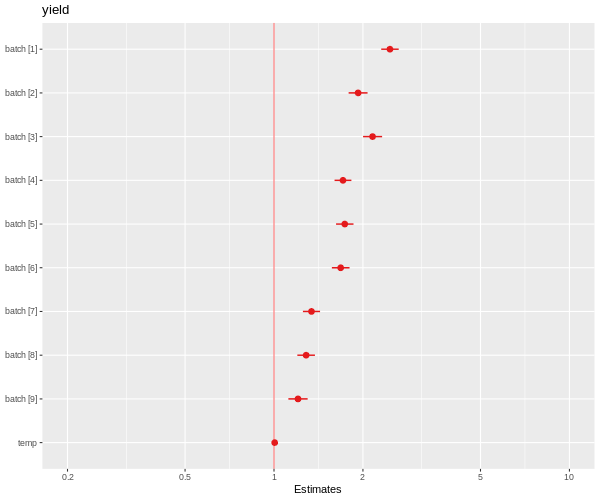

In [ ]:
%%R -w 600 -h 500 -u px
plot_model(fit.beta.03, vline.color = "red")


In [ ]:
%%R
performance::performance(fit.beta.03)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 |  RMSE | Sigma
------------------------------------------------------
-168.310 | -151.889 | -150.721 | 0.985 | 0.012 | 1.262


### Marginal Effect

To calculate marginal effects and adjusted predictions, the `predict_response()` function of {ggeffects} package is used. This function can return three types of predictions, namely, conditional effects, marginal effects or marginal means, and average marginal effects or counterfactual predictions. You can set the type of prediction you want by using the `margin` argument.

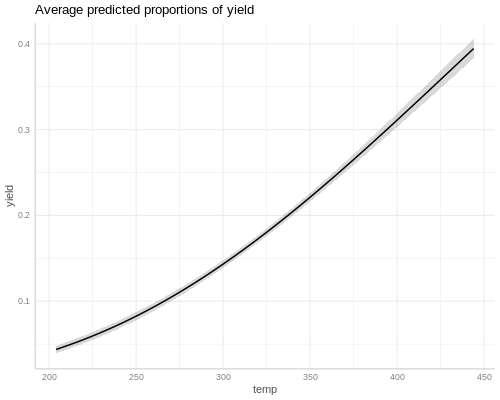

In [ ]:
%%R -w 500 -h 400 -u px
effect.temp<-ggeffects::predict_response(fit.beta.03, "temp", margin = "empirical")
plot(effect.temp)

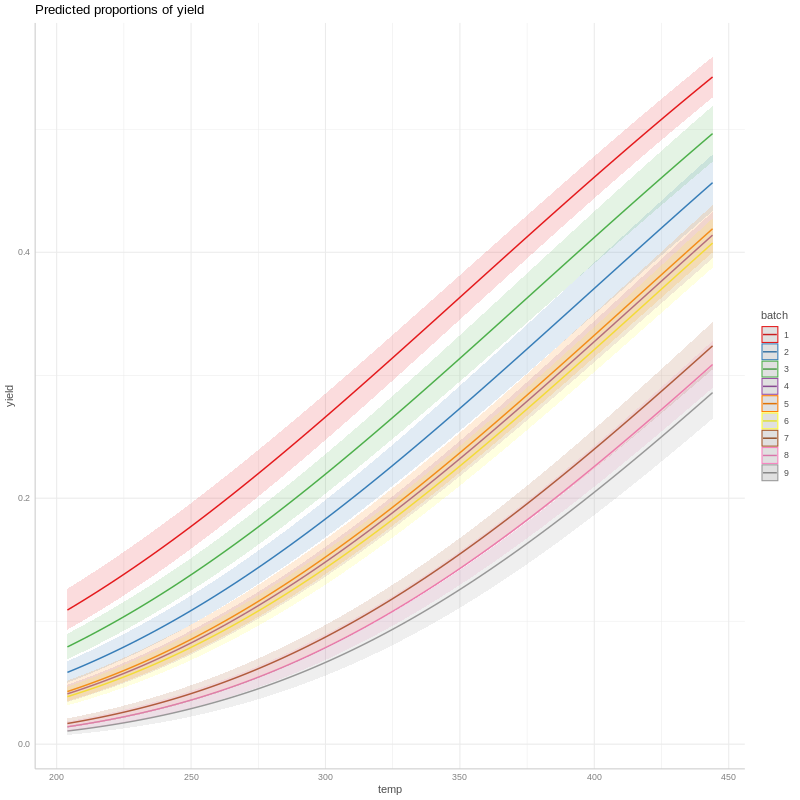

In [ ]:
%%R -w 800 -h 800 -u px
effect.temp.batch<-ggeffects::predict_response(fit.beta.03, terms = c("temp", "batch[1:9]"))
plot(effect.temp.batch)

### Cross-validation

We’ll use 5-fold cross-validation to evaluate the model's predictive performance using the Mean Squared Error (MSE) as the metric.

In [ ]:
%%R
cross_validate_betareg <- function(GasolineYield, k = 5) {
  n <- nrow(GasolineYield)
  indices <- sample(1:n)  # Randomize row indices
  fold_size <- floor(n / k)

  mse_values <- numeric(k)  # To store MSE for each fold

  for (i in 1:k) {
    # Create training and validation sets for the ith fold
    val_indices <- indices[((i - 1) * fold_size + 1):(i * fold_size)]
    train_data <- GasolineYield[-val_indices, ]
    val_data <- GasolineYield[val_indices, ]

    # Fit the model on the training set
    model <- betareg(yield ~ temp + batch,  link = "loglog", data = train_data)

    # Predict on the validation set
    predictions <- predict(model, newdata = val_data, type = "response")

    # Calculate MSE for this fold
    mse_values[i] <- mean((val_data$yield - predictions)^2)
  }

  # Return average MSE across all folds
  avg_mse <- mean(mse_values)
  return(avg_mse)
}

set.seed(123)
k <- 5
avg_mse_cv <- cross_validate_betareg(GasolineYield, k)
cat("Average Cross-Validated MSE:", avg_mse_cv, "\n")

Average Cross-Validated MSE: 0.0003569149 


## Summary and Conclusion

Beta regression is a powerful tool for modeling bounded continuous data, especially when the dependent variable takes values between 0 and 1, such as proportions or rates. By using the beta distribution, beta regression handles the constraints of bounded data while also providing flexibility in modeling both the mean and the dispersion of the response variable.
In this tutorial, we demonstrated how to implement beta regression from scratch in R using maximum likelihood estimation to estimate the model parameters. Although this approach does not use specialized beta regression packages, it highlights the underlying statistical principles of beta regression, including the formulation of the log-likelihood function and optimization techniques.

By understanding the mechanics of beta regression, users can effectively apply this technique to their datasets with bounded response variables, providing more accurate and meaningful predictions compared to traditional linear regression.


## References

1.  [Beta Regression for Percent and Proportion Data](https://rcompanion.org/handbook/J_02.html)

2.  [Beta Regression in R](https://www.zeileis.org/papers/ERCIM-2010.pdf)

3.  [Beta regression with R](https://r-statistics.co/Beta-Regression-With-R.html)

4.  [Beta Regression in R](https://research.wu.ac.at/ws/portalfiles/portal/19807993/document.pdf)